### **Data Visualization**

##### Available libraries: Matplotlib, Seaborn, Plotly

In [2]:
import pandas as pd
import numpy as np

In [3]:
# load retail csv
path_retail = 'Pandas Course Resources/retail/transactions.csv'
# argument parse_dates=['name_of_date_column'] will attempt to convert to datetime datatype when reading file
transactions = pd.read_csv(path_retail, parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [4]:
transactions.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

#### **Matplotlib** </br> Plot Method `.plot()` creates lines chart by default </br> Using `row index as x-axis` </br> plots `each numerical column as separate series on y-axis`

##### **Plot Method** </br> Calling `.plot()` on pivot tables make good plots

<Axes: >

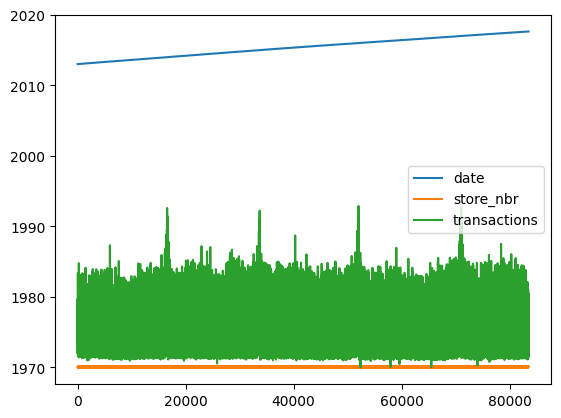

In [5]:
# plot aggregated sample_df using .plot()
transactions.plot()

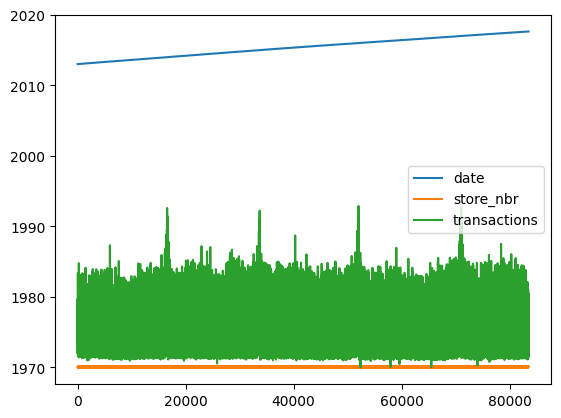

In [6]:
# to remove <Axes: > from output add ; to end of code
transactions.plot();

##### **Change x-axis**</br> By setting a `different index` </br> &nbsp;&nbsp;&nbsp;&nbsp;`pd.set_index('column_to_be_x').plot()` </br> or using `x argument` </br> &nbsp;&nbsp;&nbsp;&nbsp;`pd.plot(x='column_to_be_x')`

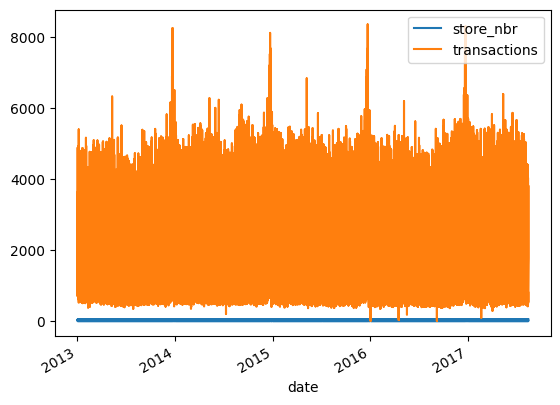

In [7]:
# using .set_index('column_to_be_x_axis') with ; to remove notebook header
transactions.set_index('date').plot();

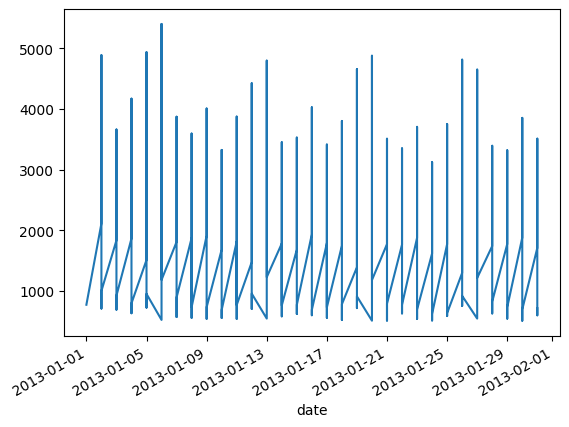

In [8]:
# using .set_index('column_to_be_x_axis'), use .loc[] for '2013-01' values and 'transactions' column
# with ; to remove notebook header
transactions.set_index('date').loc['2013-01','transactions'].plot();
# being that each date has multiple store_nbr values plot cannot extrapolate how to connect time series

##### **Can chain query() method before plot to filter plot visualization** </br> `Better to create filtered DataFrame first for plot`

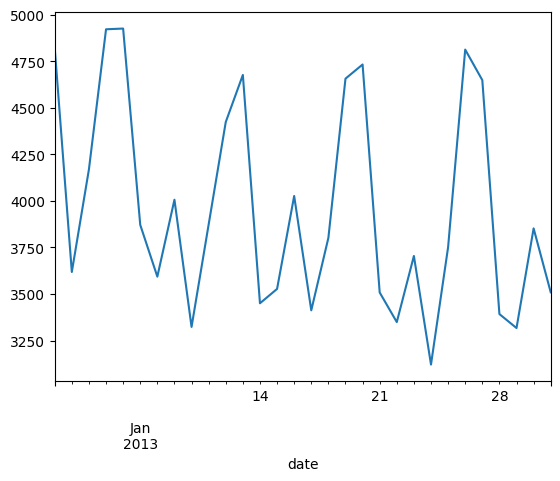

In [9]:
# can query specific store_nbr value to have time series plot
transactions.query("store_nbr == 44").set_index('date').loc['2013-01','transactions'].plot();
# creates plot for only store 44

In [10]:
# create filtered DataFrame using .loc accessor to filter for Store 44, and including 'date' and 'transactions' columns and then reset index
trans_44 = transactions.loc[transactions['store_nbr'] == 44, ['date','transactions']].reset_index(drop=True)
trans_44

,date,transactions
0,2013-01-02,4821
1,2013-01-03,3618
2,2013-01-04,4169
3,2013-01-05,4921
4,2013-01-06,4925
...,...,...
1672,2017-08-11,4418
1673,2017-08-12,4277
1674,2017-08-13,4392
1675,2017-08-14,4039


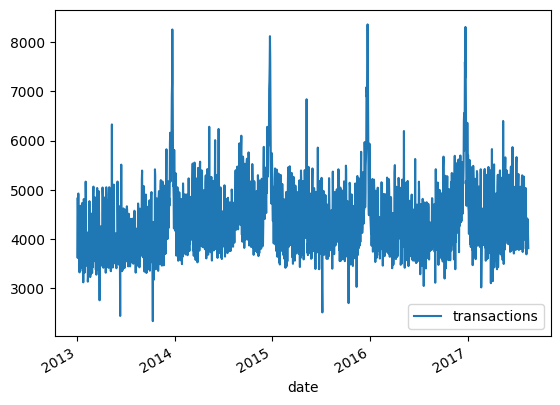

In [11]:
# generate timeseries for all datavalues of store 44
# plotting with 'x=column_for_x_axis) this doesn't alow the plot to be filtered when displayed
trans_44.plot(x='date');

<Axes: xlabel='date'>

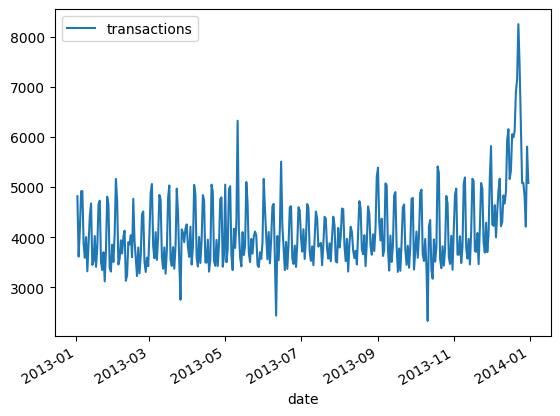

In [26]:
# using set_index('column_for_x_axis) allows for .loc to be used on the date column
trans_44.set_index('date').loc['2013'].plot()

In [12]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [13]:
# create pivot table for transactions by date for store_nbr
pivotStore44_47 = transactions.pivot_table(
    index='date',
    columns='store_nbr'
)
pivotStore44_47.head()

transactions                                                  \
store_nbr            1       2       3       4       5       6       7    
date                                                                      
2013-01-01          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2013-01-02       2111.0  2358.0  3487.0  1922.0  1903.0  2143.0  1874.0   
2013-01-03       1833.0  2033.0  3026.0  1551.0  1740.0  1795.0  1568.0   
2013-01-04       1863.0  2066.0  3188.0  1596.0  1642.0  1679.0  1513.0   
2013-01-05       1509.0  2062.0  3623.0  1825.0  1643.0  2154.0  1599.0   

                                    ...                                  \
store_nbr       8       9       10  ...      45      46      47      48   
date                                ...                                   
2013-01-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
2013-01-02  3250.0  2940.0  1293.0  ...  4208.0  4886.0  4161.0  3397.0   
2013-01-03  2904.0  2396.0  1157.0  ...  3314.0  3438.0  3660.0  2887.0   
2013-01-04  2962.0  1975.0   970.0  ...  3630.0  3434.0  3915.0  2900.0   
2013-01-05  3060.0  2604.0  1269.0  ...  4331.0  4935.0  4764.0  4084.0   

                                                   
store_nbr       49      50      51  52  53     54  
date                                               
2013-01-01     NaN     NaN     NaN NaN NaN    NaN  
2013-01-02  2346.0  3077.0  1985.0 NaN NaN  998.0  
2013-01-03  1702.0  2307.0  1644.0 NaN NaN  920.0  
2013-01-04  2016.0  2698.0  1786.0 NaN NaN  794.0  
2013-01-05  2562.0  3459.0  2068.0 NaN NaN  949.0  

[5 rows x 54 columns]

In [14]:
# modify pivot table for transactions by date for store_nbr
# drop column index level (axis=1)
pivotStore44_47 = transactions.pivot_table(
    index='date',
    columns='store_nbr',
).droplevel(0,axis=1)
pivotStore44_47.head()

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,2111.0,2358.0,3487.0,1922.0,1903.0,2143.0,1874.0,3250.0,2940.0,1293.0,...,4208.0,4886.0,4161.0,3397.0,2346.0,3077.0,1985.0,NaN,NaN,998.0
2013-01-03,1833.0,2033.0,3026.0,1551.0,1740.0,1795.0,1568.0,2904.0,2396.0,1157.0,...,3314.0,3438.0,3660.0,2887.0,1702.0,2307.0,1644.0,NaN,NaN,920.0
2013-01-04,1863.0,2066.0,3188.0,1596.0,1642.0,1679.0,1513.0,2962.0,1975.0,970.0,...,3630.0,3434.0,3915.0,2900.0,2016.0,2698.0,1786.0,NaN,NaN,794.0
2013-01-05,1509.0,2062.0,3623.0,1825.0,1643.0,2154.0,1599.0,3060.0,2604.0,1269.0,...,4331.0,4935.0,4764.0,4084.0,2562.0,3459.0,2068.0,NaN,NaN,949.0


<Axes: xlabel='date'>

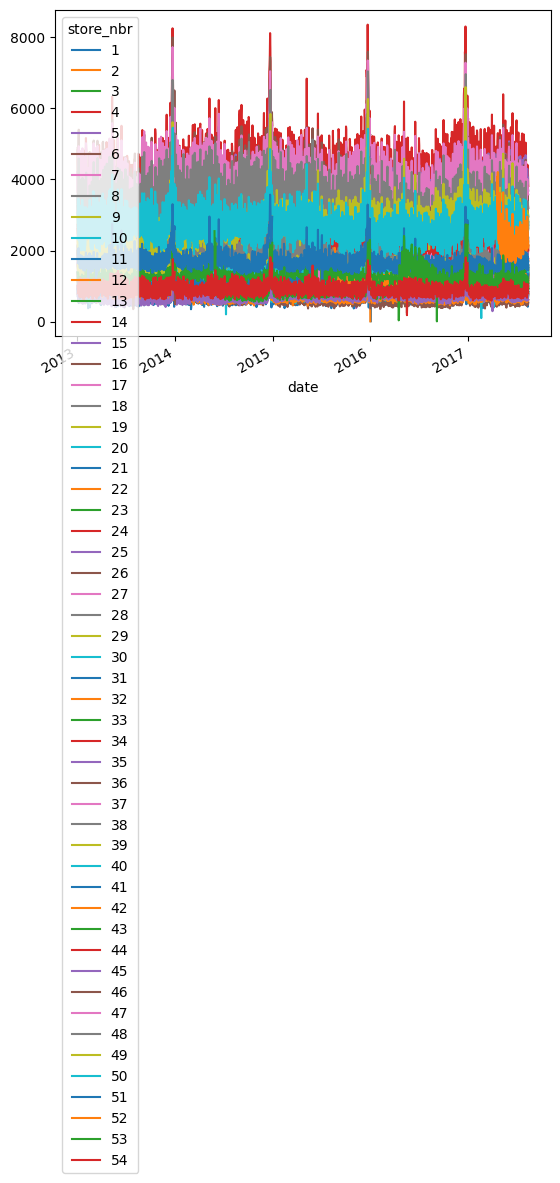

In [25]:
pivotStore44_47.plot()

In [16]:
# can use query() with pivot table creation, 
querypivotStore44_47 = transactions.query("store_nbr in [44,47]").pivot_table(
    index='date',
    columns='store_nbr',
).droplevel(0,axis=1)
querypivotStore44_47.head()

store_nbr,44,47
date,,
2013-01-02,4821.0,4161.0
2013-01-03,3618.0,3660.0
2013-01-04,4169.0,3915.0
2013-01-05,4921.0,4764.0
2013-01-06,4925.0,4935.0


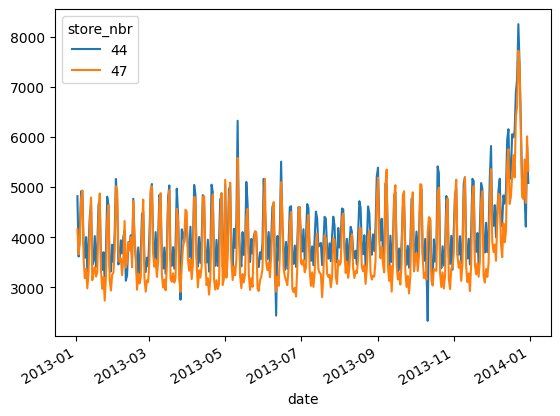

In [29]:
# having pivot_table with date as index will make it the index in the plot
# can then use .loc[''] to filter x-axis for specific date
querypivotStore44_47.loc['2013'].plot();

In [ ]:
# having pivot_table with date as index will make it the index in the plot
# can then use .loc[''] to filter x-axis for specific range of date
querypivotStore44_47.loc['2013':'2014'].plot();

In [17]:
pivotStore44_47.head()

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,2111.0,2358.0,3487.0,1922.0,1903.0,2143.0,1874.0,3250.0,2940.0,1293.0,...,4208.0,4886.0,4161.0,3397.0,2346.0,3077.0,1985.0,NaN,NaN,998.0
2013-01-03,1833.0,2033.0,3026.0,1551.0,1740.0,1795.0,1568.0,2904.0,2396.0,1157.0,...,3314.0,3438.0,3660.0,2887.0,1702.0,2307.0,1644.0,NaN,NaN,920.0
2013-01-04,1863.0,2066.0,3188.0,1596.0,1642.0,1679.0,1513.0,2962.0,1975.0,970.0,...,3630.0,3434.0,3915.0,2900.0,2016.0,2698.0,1786.0,NaN,NaN,794.0
2013-01-05,1509.0,2062.0,3623.0,1825.0,1643.0,2154.0,1599.0,3060.0,2604.0,1269.0,...,4331.0,4935.0,4764.0,4084.0,2562.0,3459.0,2068.0,NaN,NaN,949.0


In [22]:
# if created a pivot table then can filter using standard pandas bracket notation
pivotStore44_47.loc[:,[44,47]].head()

store_nbr,44,47
date,,
2013-01-01,NaN,NaN
2013-01-02,4821.0,4161.0
2013-01-03,3618.0,3660.0
2013-01-04,4169.0,3915.0
2013-01-05,4921.0,4764.0
